# TTS Using FastSpeech 2 Architecture

pip install datasets
pip install librosa

In [57]:
import transformers
import matplotlib.pyplot as plt
import librosa
import numpy as np

## Requirements
1. datasets
2. transformers
3. librosa
4. matplotlib
5. numpy


## Fastspeech 2 architecture
Variance features: 1. Duration, 2. Pitch, 3. Energy

In [58]:
from datasets import load_dataset

ds = load_dataset("SPRINGLab/IndicVoices-R_Hindi", split="train", streaming=True)
small_ds = [next(iter(ds)) for _ in range(4)]  # Fetch only 5 rows

In [59]:
audio = small_ds[3]['audio']['array']

In [60]:
type(audio)

numpy.ndarray

In [61]:
small_ds[0]

{'text': 'हमें कृषि के लिए उपयोग में आने वाली विभिन्न विभिन्न यात्रा औजारों का प्रयोग किया जाता है जैसे कि हम',
 'lang': 0,
 'samples': 356064,
 'verbatim': 'हमें कृषि के लिए उपयोग में आने वाली विभिन्न विभिन्न यात्रा औजारों का प्रयोग किया जाता है जैसे कि हम',
 'normalized': 'हमें कृषि के लिए उपयोग में आने वाली विभिन्न विभिन्न यात्रा औजारों का प्रयोग किया जाता है जैसे कि हम',
 'speaker_id': 'S4259138800367594',
 'scenario': 0,
 'task_name': 'DOI - Agriculture',
 'gender': 0,
 'age_group': 0,
 'job_type': 1,
 'qualification': 3,
 'area': 0,
 'district': 'Katni',
 'state': 1,
 'occupation': 'Student',
 'utterance_pitch_mean': 224.82884,
 'utterance_pitch_std': 56.992496,
 'snr': 52.7209968567,
 'c50': 54.1307792664,
 'speaking_rate': 12.261548743,
 'cer': 'tensor(0.)',
 'duration': 8.0740208333,
 'audio': {'path': '5348024557687837_chunk_1_enhanced.wav',
  'array': array([-0.01153564, -0.00985718, -0.01017761, ...,  0.00447083,
          0.00541687,  0.00085449]),
  'sampling_rate': 48000

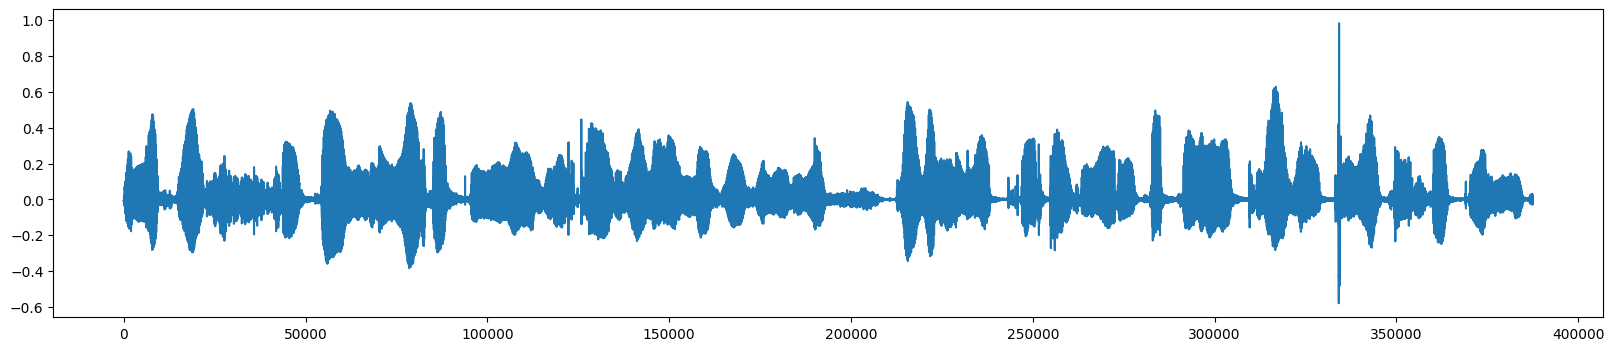

In [62]:
plt.figure(figsize=(20, 4))
plt.plot(audio)

## Mel Spectrogram

In [68]:
sr = 48000 # from the data

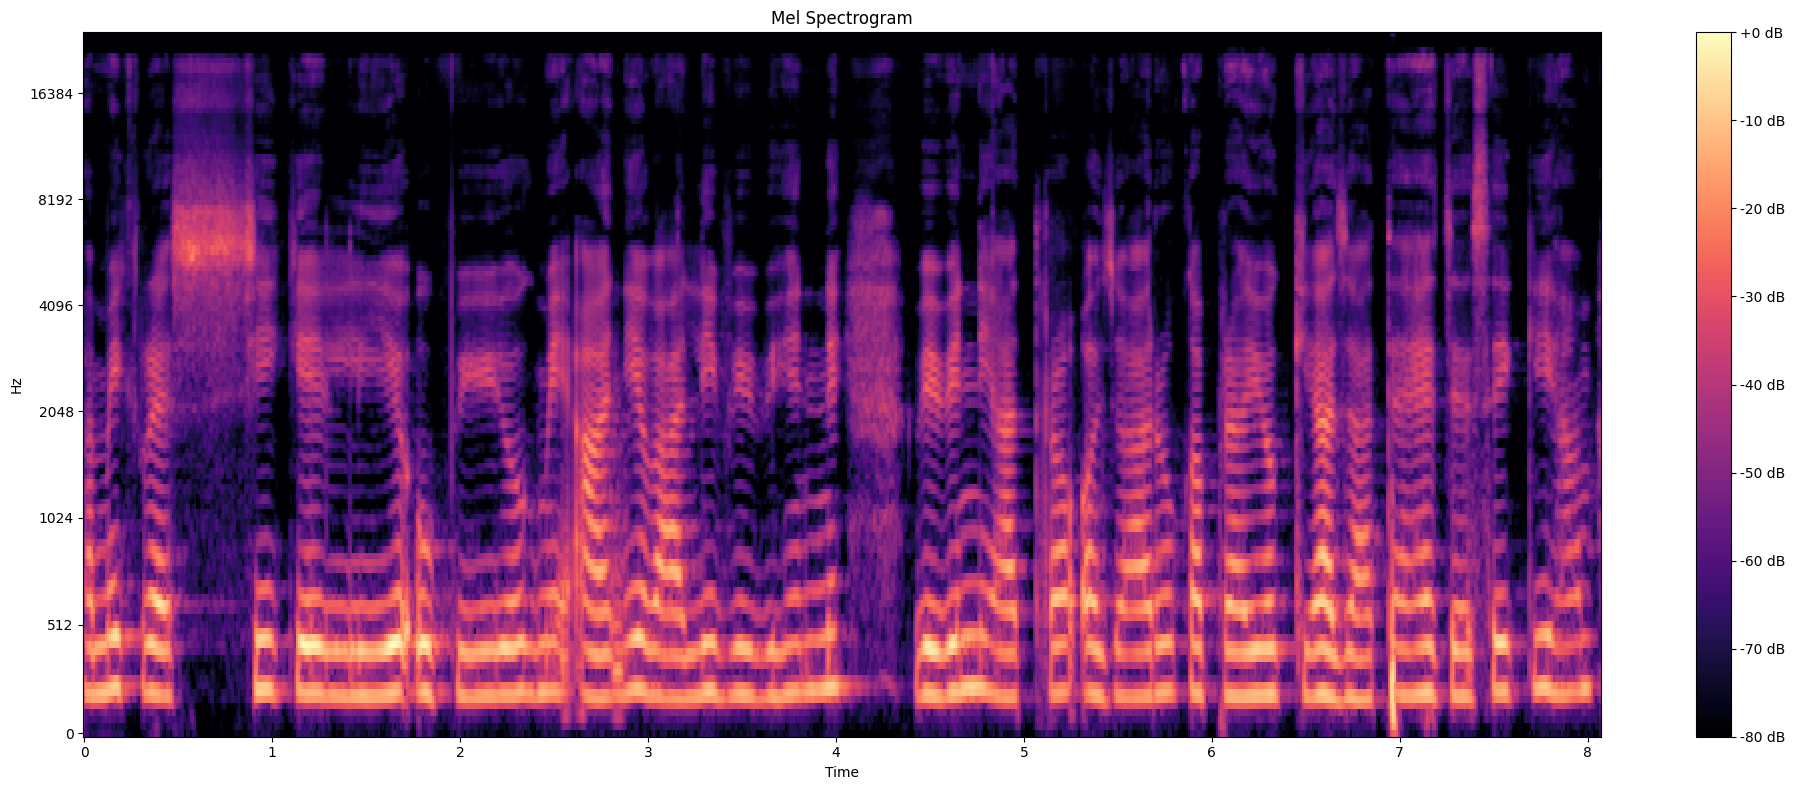

In [63]:
S = librosa.feature.melspectrogram(y=audio, sr=48000, n_mels=128, hop_length=512, window='hann')
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(20, 8))
librosa.display.specshow(S_dB, sr=48000, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

### Pitch

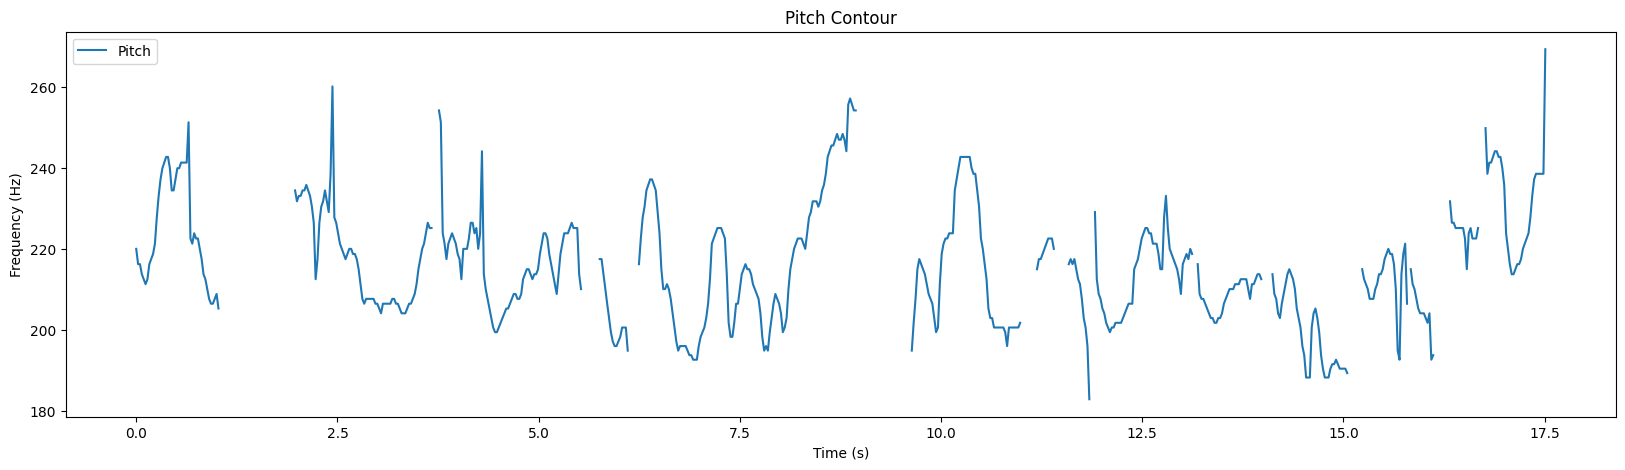

In [74]:
fmin = librosa.note_to_hz('C2')  # min freq
fmax = librosa.note_to_hz('C7')  # max freq

# Extract pitch using probabilistic YIN (pYIN)
pitches, voiced_flags, voiced_probs = librosa.pyin(audio, fmin=fmin, fmax=fmax, sr=48000)

# Plot the pitch contour
times = librosa.times_like(pitches)
plt.figure(figsize=(20, 5))
plt.plot(times, pitches, label='Pitch')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour')
plt.legend()
plt.show()


## Energy (Loudness)

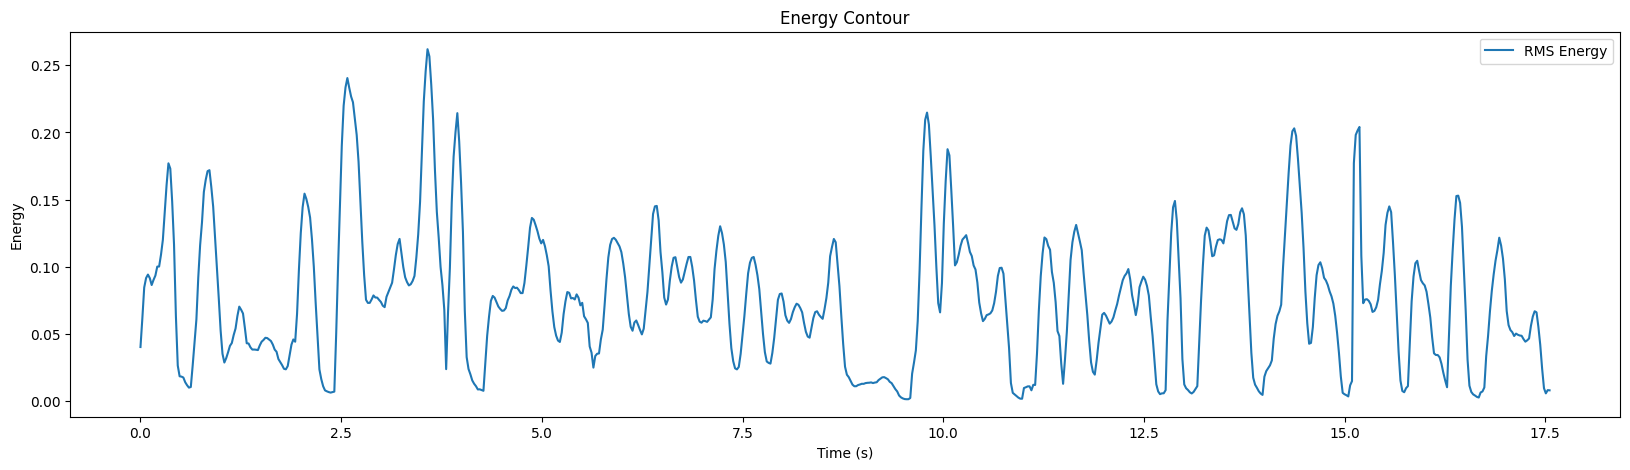

In [75]:
# Compute RMS energy
rms = librosa.feature.rms(y=audio)

# Plot RMS energy
times = librosa.times_like(rms)
plt.figure(figsize=(20, 5))
plt.plot(times, rms[0], label='RMS Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Energy Contour')
plt.legend()
plt.show()


## Duration

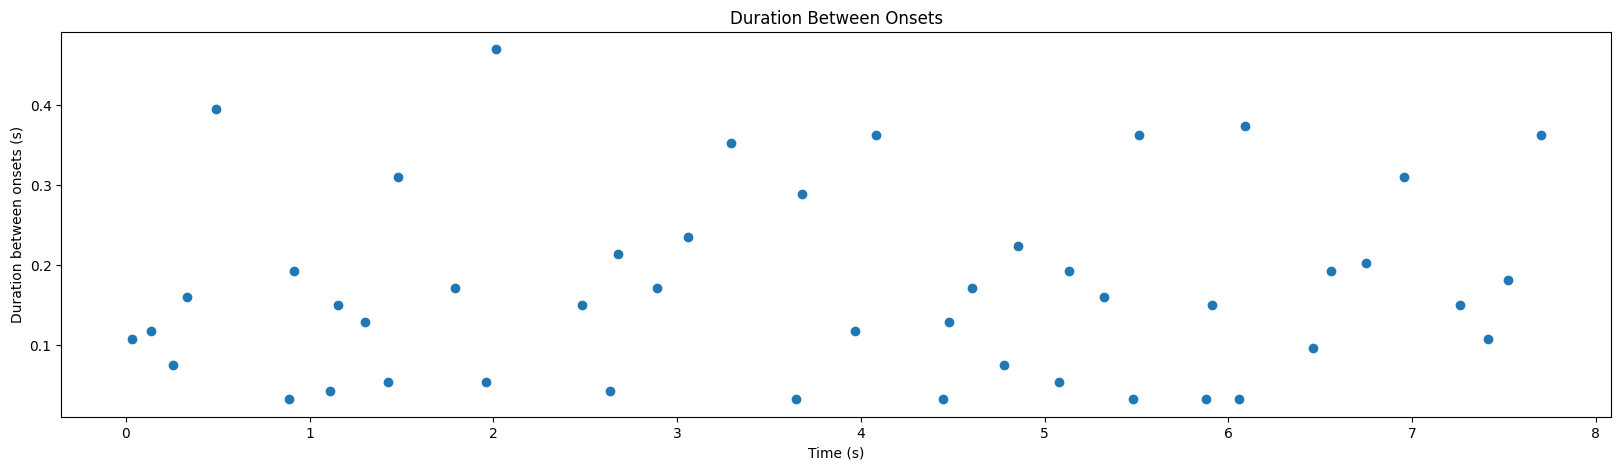

In [76]:
# Detect onset frames
onset_frames = librosa.onset.onset_detect(y=audio, sr=sr)

# Convert onset frames to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Calculate durations between onsets
durations = np.diff(onset_times)

# Plot durations
plt.figure(figsize=(20, 5))
plt.plot(onset_times[:-1], durations, marker='o', linestyle='None')
plt.xlabel('Time (s)')
plt.ylabel('Duration between onsets (s)')
plt.title('Duration Between Onsets')
plt.show()
